# Economic analysis of the US

In this assignment we wish to investigate the interest rate trend across the US over time and how it is related to developments in the unemployment rate as well as growth in GDP, since the interest rate set on the basis of these parameters, among others. The topic is of relevance given the recent years of turbulence, notably caused by the financial crisis of 2008 as well as the recent pandemic.

First we need to install two packages. The first one is a wrapper for multiple APIs with a pandas interface:

In [46]:
!pip install pandas-datareader

The second package we need to install is the plotly library, which is an interactive opensource library. This will be used for plotting the variables later on in the analysis:

In [47]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


Imports and setting magics:

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.style.use('seaborn-whitegrid')
from datetime import datetime
import plotly.express as px

import pandas_datareader as pdr

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Getting functions from our .py file
import dataproject as dp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reading and cleaning the data

First we set the date and time so that data is collected from the beginning of 2005 until the latest data point.

In [56]:
start = datetime(2005,1,1)
end = datetime.now()

For this analysis, we are going to use data for the unemployment rate, GDP, interest rate (the Federal Funds rate) and the inflation rate in the US. Each dataset is imported seperately through the FRED's API and then later we will merge all datasets into one. 

In order to retrieve the data, we have created a function in the .py file that we call for each retreival. By creating this function, we are able to reset the index and get the DATE field as a column, which we will need for the visualization and analysis.

We start by importing monthly data on the US unemployment rate. Then we rename some columns and show the results in a table.

In [57]:
# Unemployment rate
series1 = 'UNRATE'

unemp = dp.get_fred_data(start, end, var_name=[series1])
unemp.rename(columns = {'UNRATE': 'Unemp'}, inplace = True)

unemp


,DATE,Unemp
0,2005-01-01,5.3
1,2005-02-01,5.4
2,2005-03-01,5.2
3,2005-04-01,5.2
4,2005-05-01,5.1
...,...,...
202,2021-11-01,4.2
203,2021-12-01,3.9
204,2022-01-01,4.0
205,2022-02-01,3.8


Next, we collect quarterly data on US GDP. Using this variable, we create a new variable that shows the year-over-year percentage growth rate in order to get a better idea of the development of GDP.

The variable GDP is in billions of chained 2012 dollars with a seasonally adjusted annual rate. 

In [58]:
# Real Gross Domestic Product  
series2 = 'GDPC1'
gdp = dp.get_fred_data(start, end, var_name=[series2])

gdp['pct_yoy'] = gdp['GDPC1'].pct_change(4) * 100
gdp.rename(columns = {'GDPC1': 'GDP', 'pct_yoy': 'GDP YoY growth'}, inplace = True)

gdp

,DATE,GDP,GDP YoY growth
0,2005-01-01,14767.846,NaN
1,2005-04-01,14839.707,NaN
2,2005-07-01,14956.291,NaN
3,2005-10-01,15041.232,NaN
4,2006-01-01,15244.088,3.224858
...,...,...,...
63,2020-10-01,18767.778,-2.262915
64,2021-01-01,19055.655,0.546977
65,2021-04-01,19368.310,12.226677
66,2021-07-01,19478.893,4.946556


Now we will import the daily inflation rate and rename columns.

In [59]:
# Sticky Price Consumer Price Index less Food and Energy
series3 = 'CORESTICKM159SFRBATL'
infl = dp.get_fred_data(start, end, var_name=[series3])

infl.rename(columns={'CORESTICKM159SFRBATL': 'Inflation'}, inplace = True)

infl

,DATE,Inflation
0,2005-01-01,2.315890
1,2005-02-01,2.286245
2,2005-03-01,2.246153
3,2005-04-01,2.239722
4,2005-05-01,2.357955
...,...,...
202,2021-11-01,3.205069
203,2021-12-01,3.467011
204,2022-01-01,3.982988
205,2022-02-01,4.297858


And lastly, we import the daily Federal Funds Effective Rate and rename columns.

In [60]:
# Federal Funds Effective Rate
series4 = 'DFF'
intrate = get_fred_data(start, end, var_name=[series4])

intrate.rename(columns={'DFF': 'Int. Rate'}, inplace = True)

intrate

,DATE,Int. Rate
0,2005-01-01,1.97
1,2005-01-02,1.97
2,2005-01-03,2.31
3,2005-01-04,2.25
4,2005-01-05,2.25
...,...,...
6307,2022-04-09,0.33
6308,2022-04-10,0.33
6309,2022-04-11,0.33
6310,2022-04-12,0.33


## Exploring the datasets

In this section we will take a closer look at the four datasets by visualizing them in interactive plots using the plotly library. This creates a graph where each value and date is shown when hovering over it. Furthermore, this library also enables zoom, thus if once wishes to inspect a certain period more closely, it is possible to zoom in on the period.

**Unemployment rate** :

In [61]:
fig_1 = px.line(unemp,
    x = 'DATE',
    y = 'Unemp',
    title = 'Unemployment rate in the US')

fig_1.show()

**GDP YoY growth:**

In [62]:
fig_2 = px.line(gdp,
    x = 'DATE',
    y = 'GDP YoY growth',
    title = 'GDP growth (YoY) in the USA')

fig_2.show()

**Inflation rate:**

In [63]:
fig_3 = px.line(infl,
    x = 'DATE',
    y = 'Inflation',
    title = 'Inflation rate in the US')

fig_3.show()

**Interest rate:**

In [64]:
fig_4 = px.line(intrate,
    x = 'DATE',
    y = 'Int. Rate',
    title = 'Federal Funds Effective Rate')

fig_4.show()

# Merge data sets

Now we have fetched and explored the data, so it is time to merge all the datasets into one.

Since we have both quarterly, monthly and daily dataset, we will merge them in three steps using left joins. By doing so, the monthly and daily datasets will automatically be converted to quarterly data. We note here that using this method does not convert an average of i.e. three months to get an estimate for quarterly data. Instead, the value that will be presented in the new table, is simply the observation on the day of each quarter, that is data observed on 20xx-01-01, 20xx-04-01, 20xx-07-01 and 20xx-10-01. All other datapoints are dropped when using the left join. This is obtained by always using the quarterly dataset as the left table. 

We will start by merging the monthly dataset on unemployment with the quarterly GDP dataset. Since both tables have a column called 'DATE' with the same format, we will merge the two tables on this column.

In [65]:
merge1 = gdp.merge(unemp, left_on = 'DATE', right_on = 'DATE')
merge1

,DATE,GDP,GDP YoY growth,Unemp
0,2005-01-01,14767.846,NaN,5.3
1,2005-04-01,14839.707,NaN,5.2
2,2005-07-01,14956.291,NaN,5.0
3,2005-10-01,15041.232,NaN,5.0
4,2006-01-01,15244.088,3.224858,4.7
...,...,...,...,...
63,2020-10-01,18767.778,-2.262915,6.9
64,2021-01-01,19055.655,0.546977,6.4
65,2021-04-01,19368.310,12.226677,6.0
66,2021-07-01,19478.893,4.946556,5.4


Next we join the new table on the left with the inflation table on the right. 

In [66]:
merge2 = merge1.merge(infl, left_on = 'DATE', right_on = 'DATE')
merge2

,DATE,GDP,GDP YoY growth,Unemp,Inflation
0,2005-01-01,14767.846,NaN,5.3,2.315890
1,2005-04-01,14839.707,NaN,5.2,2.239722
2,2005-07-01,14956.291,NaN,5.0,2.301079
3,2005-10-01,15041.232,NaN,5.0,2.325302
4,2006-01-01,15244.088,3.224858,4.7,2.451019
...,...,...,...,...,...
63,2020-10-01,18767.778,-2.262915,6.9,1.848308
64,2021-01-01,19055.655,0.546977,6.4,1.504532
65,2021-04-01,19368.310,12.226677,6.0,2.284027
66,2021-07-01,19478.893,4.946556,5.4,2.325734


Lastly, this new table is then merged with the interest rate table. Again, we use the merge2 table on the left, the interest rate table on the right and we merge on the 'DATE' column. 

Since the GDP YoY growth has no values for 2005, we drop those rows so the final table only includes rows with no missing values, and then we reset the index.

In [69]:
final_table = merge2.merge(intrate, left_on = 'DATE', right_on = 'DATE')
final_table.dropna(inplace = True)
final_table.reset_index(drop = True)

,DATE,GDP,GDP YoY growth,Unemp,Inflation,Int. Rate
0,2006-01-01,15244.088,3.224858,4.7,2.451019,4.09
1,2006-04-01,15281.525,2.977269,4.7,2.680693,5.00
2,2006-07-01,15304.517,2.328291,4.7,3.093999,5.05
3,2006-10-01,15433.643,2.608902,4.4,3.291125,5.34
4,2007-01-01,15478.956,1.540715,4.6,3.145734,5.17
...,...,...,...,...,...,...
59,2020-10-01,18767.778,-2.262915,6.9,1.848308,0.09
60,2021-01-01,19055.655,0.546977,6.4,1.504532,0.09
61,2021-04-01,19368.310,12.226677,6.0,2.284027,0.07
62,2021-07-01,19478.893,4.946556,5.4,2.325734,0.10


We now have one table, called final_table, with observations on GDP, GDP YoY growth, unemployment rate, inflation and interest rate for each quarter from 2006 until the last observed quarter, which is 2021-10-01. 

# Analysis

In order to better study the variables in relation to each other, we plot the merged dataset into one figure.

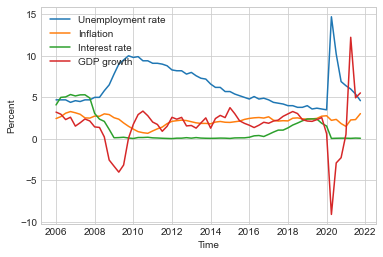

<Figure size 432x432 with 0 Axes>

In [83]:
plt.plot(final_table['DATE'], final_table['Unemp'], label = "Unemployment rate")
plt.plot(final_table['DATE'], final_table['Inflation'], label = "Inflation")
plt.plot(final_table['DATE'], final_table['Int. Rate'], label = "Interest rate")
plt.plot(final_table['DATE'], final_table['GDP YoY growth'], label = "GDP growth")

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Percent')

f = plt.figure(figsize=(9, 9))
f.set_figwidth(6)
f.set_figheight(6)

The figure above offers some interesting insights on how the US economy has progressed over time. What is especially interesting is observing and comparing the different variables during the financial crisis around 2008 as well as the recent Covid-19 pandemic. The period of recovery for these two crises are very different, probably because the reasons behind the outbreaks are inherently different. The underlying reasons for the financial crisis were mainly subprime loans being traded and a poorly regulated financial market, whereas the main cause in 2020 was the spread of the deadly virus and the restrictive measures. 

The figure shows that the financial crisis around 2008 gave rise to a steep increase in unemployment, which later experienced a long and slow period of recovery. The unemployment rate were not back at the same level as before the crisis until the end of 2015. The GDP growth stabilizes faster than the unemployment rate. Where the sharp increase in unemployment begins, US GDP growth dropped and was at it's worst around the end of 2009. It is also possible to follow how the interest rate around this time is being lowered to almost zero percent, in an attempt to get the economy going again. According to economic policy theory, adjusting the interest rate to a lower level will stimulate consumption; households would then rather spend their money instead of keeping them in the bank because they do not get enough return on the savings. Another way of getting the economy back on track is also financial stimulus towards households and firms. Around 2010 the growth in GDP is back at a normal rate, which shows that it takes some time for the adjustment in interest rate to have an effect.  

If we take an even closer look at the development of the variables during the past few years, it becomes more clear how the Covid-19 pandemic has affected the economy in the US. We can do this by using indexing. However, since we don't want to overide this indexing with the full table, we create a copy/new variable where we store the indexed table.

In [90]:
final_table_copy = final_table.loc[final_table.DATE > '2017-10-01']
final_table_copy.reset_index(drop = True)

,DATE,GDP,GDP YoY growth,Unemp,Inflation,Int. Rate
0,2018-01-01,18436.262,3.015312,4.0,2.166829,1.33
1,2018-04-01,18590.004,3.296152,4.0,2.492147,1.67
2,2018-07-01,18679.599,3.052886,3.8,2.531541,1.91
3,2018-10-01,18721.281,2.320617,3.8,2.419846,2.18
4,2019-01-01,18833.195,2.153002,4.0,2.378344,2.40
5,2019-04-01,18982.528,2.111479,3.6,2.410959,2.41
6,2019-07-01,19112.653,2.318326,3.7,2.467932,2.39
7,2019-10-01,19202.310,2.569424,3.6,2.734200,1.88
8,2020-01-01,18951.992,0.630785,3.5,2.788599,1.55
9,2020-04-01,17258.205,-9.083737,14.7,2.233555,0.06


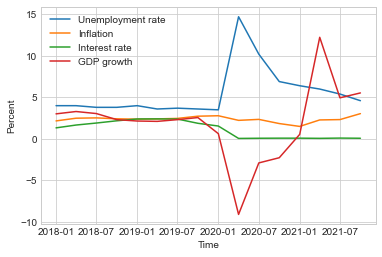

<Figure size 432x432 with 0 Axes>

In [91]:
plt.plot(final_table_copy['DATE'], final_table_copy['Unemp'], label = "Unemployment rate")
plt.plot(final_table_copy['DATE'], final_table_copy['Inflation'], label = "Inflation")
plt.plot(final_table_copy['DATE'], final_table_copy['Int. Rate'], label = "Interest rate")
plt.plot(final_table_copy['DATE'], final_table_copy['GDP YoY growth'], label = "GDP growth")

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Percent')

f = plt.figure(figsize=(9, 9))
f.set_figwidth(6)
f.set_figheight(6)

The Covid-19 crisis show even more extreme numbers than the financial crisis. In the figure it is shown that around the beginning of 2020 there was a sharp drop in GDP growth mirrored by a high rise in unemployment when the news about the virus spread around the world. It would make sense to believe that the economic state also got worse when lockdown restrictions were introduced. Again, the interest rate was lowered to around zero as an attempt to stimulate the economy. In comparison to the financial crisis 2008, the path of recovery was a lot faster here. In the beginning, the whole economy basically came to a halt. But as households and firms adapted, for example through working and studying from home, the economy quickly bounced back to a level of greater GDP growth, followed by an extremely high rise. The growth in GDP is at an abnormally high rate still, whereas the rate of unemployment almost is back at the level before the start of the pandemic. 

# Conclusion

From our analysis, we have observed various trends in the US economy. For example, the period from 2006 to 2022 is pervaded by two great shocks to the US economy, the financial crisis of 2009 as well as the covid-19 pandemic. The recovery path for the financial crisis was longer whereas the shocks to the economy were far more extreme during the covid-19 pandemic, mainly due to the underlying reasons for each of the crisis being inherently different. However, for both of these crises, the developments over time show that the interest rate is modified to a lower rate in the period of recession as an attempt to accelerate the economy, which is in line with economic policy theory. 